In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
job_skills = pd.read_csv('../data/job_skills.csv')
linkedin_job_postings = pd.read_csv('../data/linkedin_job_postings.csv')

In [5]:
job_skills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [6]:
linkedin_job_postings.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [7]:
linkedin_job_posting = pd.merge(linkedin_job_postings, job_skills, on='job_link', how = 'inner')

In [8]:
print(linkedin_job_posting.shape)
print('\n')
print(linkedin_job_posting.isna().sum())
print('\n')
linkedin_job_posting = linkedin_job_posting.dropna()
print(linkedin_job_posting.isna().sum())
print('\n')
print(linkedin_job_posting.shape)

(1296381, 15)


job_link                  0
last_processed_time       0
got_summary               0
got_ner                   0
is_being_worked           0
job_title                 0
company                   9
job_location             19
first_seen                0
search_city               0
search_country            0
search_position           0
job_level                 0
job_type                  0
job_skills             2085
dtype: int64


job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             0
dtype: int64


(1294268, 15)


In [9]:
linkedin_job_posting = linkedin_job_posting.applymap(lambda s:s.lower() if type(s) == str else s)
linkedin_job_posting = linkedin_job_posting.replace({' & ': ' and '}, regex=True)

C:\Users\marck\AppData\Local\Temp\ipykernel_20888\1441497208.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  linkedin_job_posting = linkedin_job_posting.applymap(lambda s:s.lower() if type(s) == str else s)


In [10]:
linkedin_job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"medical equipment sales, key competitors, term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"nursing, bachelor of science in nursing, maste..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,restaurant supervisor - the forklift,wasatch adaptive sports,"sandy, ut",2024-01-14,tooele,united states,stand-in,mid senior,onsite,"restaurant operations management, inventory ma..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,independent real estate agent,howard hanna | rand realty,"englewood cliffs, nj",2024-01-16,pinehurst,united states,real-estate clerk,mid senior,onsite,"real estate, customer service, sales, negotiat..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,registered nurse (rn),trinity health mi,"muskegon, mi",2024-01-14,muskegon,united states,nurse practitioner,mid senior,onsite,"nursing, bsn, medical license, virtual rn, nur..."


In [11]:
#funcino para iterar sobre skills de una lista de habilidades y tambien remover 2 is, it, am, etc
#Las palabras que sean de longuitud mayor a 3 se quedan, mientras que las que son menores no se incluyen
def removing(row):
    skills = row['job_skills'].split(', ')
    skills = [skills for skills in skills if len(skills) >= 3]
    return skills

In [13]:
linkedin_job_posting['skills'] = linkedin_job_posting.apply(removing, axis=1)
linkedin_job_posting['skills_count']= linkedin_job_posting['skills'].apply(len)
linkedin_job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills,skills_count
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"medical equipment sales, key competitors, term...","[medical equipment sales, key competitors, ter...",25
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"nursing, bachelor of science in nursing, maste...","[nursing, bachelor of science in nursing, mast...",17
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,restaurant supervisor - the forklift,wasatch adaptive sports,"sandy, ut",2024-01-14,tooele,united states,stand-in,mid senior,onsite,"restaurant operations management, inventory ma...","[restaurant operations management, inventory m...",43
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,independent real estate agent,howard hanna | rand realty,"englewood cliffs, nj",2024-01-16,pinehurst,united states,real-estate clerk,mid senior,onsite,"real estate, customer service, sales, negotiat...","[real estate, customer service, sales, negotia...",18
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,registered nurse (rn),trinity health mi,"muskegon, mi",2024-01-14,muskegon,united states,nurse practitioner,mid senior,onsite,"nursing, bsn, medical license, virtual rn, nur...","[nursing, bsn, medical license, virtual rn, nu...",9


In [14]:
linkedin_job_posting["search_country"] = linkedin_job_posting["search_country"].astype('category')
linkedin_job_posting["search_country"].cat.categories

Index(['australia', 'canada', 'united kingdom', 'united states'], dtype='object')

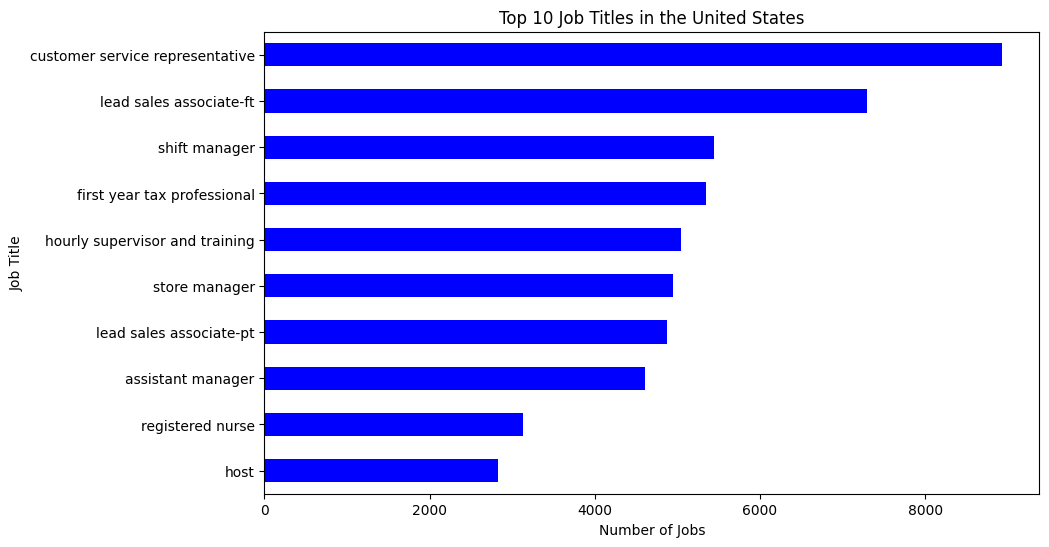

In [20]:
us_jobs =  linkedin_job_posting[linkedin_job_posting['search_country'] == 'united states']
job_count = us_jobs['job_title'].value_counts()
top_10_us_jobs = job_count.head(10)

top_10_us_jobs.plot(kind='barh', figsize=(10,6), color='blue')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles in the United States')
plt.gca().invert_yaxis()
plt.show()

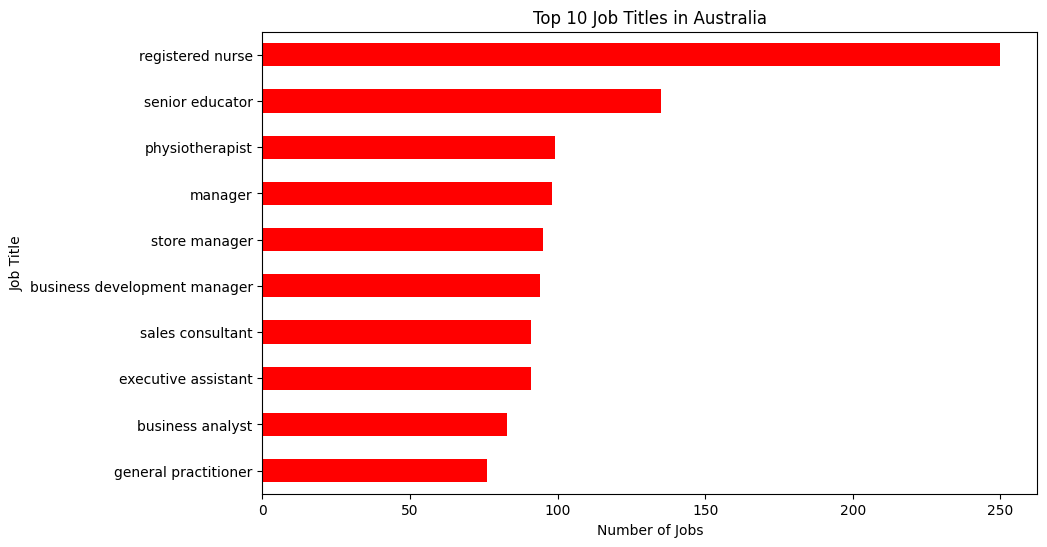

In [ ]:
australia_jobs = linkedin_job_posting[linkedin_job_posting['search_country']=='australia']
job_count_aus = australia_jobs['job_title'].value_counts()
top_10_aus_jobs = job_count_aus.head(10)

top_10_aus_jobs.plot(kind='barh', figsize=(10,6), color='red')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles in Australia')
plt.gca().invert_yaxis()  
plt.show()